# Teifi catchment
# 1. MLP
## Random search (1-100 units search space)

# Hyperparameter tuning using model_builder function from tensorflow   (Standard normalization)
(After midterm)
#(https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [1]:
import numpy as np
import pandas as pd

### define file path
path = 'Teifi_R and Q with lag.csv'  ####### This excel data is not scaled/normalized

## Read CSV file and convert it to dataframe

df = pd.read_csv( path, sep = ',', header = 'infer')


In [2]:
df

,Date,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
0,09/10/2000,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,12.9,70.30
1,10/10/2000,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,73.51
2,11/10/2000,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,96.17
3,12/10/2000,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,132.60
4,13/10/2000,2.7,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,119.70
...,...,...,...,...,...,...,...,...,...,...,...
3639,26/09/2010,0.0,0.0,0.3,9.5,17.1,0.0,0.1,0.9,0.5,17.29
3640,27/09/2010,0.0,0.0,0.0,0.3,9.5,17.1,0.0,0.1,0.9,15.30
3641,28/09/2010,14.1,0.0,0.0,0.0,0.3,9.5,17.1,0.0,0.1,14.28
3642,29/09/2010,0.2,14.1,0.0,0.0,0.0,0.3,9.5,17.1,0.0,23.13


In [3]:
df = df.set_index('Date')
print(df)

              Rt  R_t_1  R_t_2  R_t_3  R_t_4  R_t_5  R_t_6  R_t_7  R_t_8  \
Date                                                                       
09/10/2000  15.7   11.8    1.6    2.8    1.1    7.7    7.7    2.9   12.9   
10/10/2000  21.4   15.7   11.8    1.6    2.8    1.1    7.7    7.7    2.9   
11/10/2000  10.3   21.4   15.7   11.8    1.6    2.8    1.1    7.7    7.7   
12/10/2000  21.9   10.3   21.4   15.7   11.8    1.6    2.8    1.1    7.7   
13/10/2000   2.7   21.9   10.3   21.4   15.7   11.8    1.6    2.8    1.1   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
26/09/2010   0.0    0.0    0.3    9.5   17.1    0.0    0.1    0.9    0.5   
27/09/2010   0.0    0.0    0.0    0.3    9.5   17.1    0.0    0.1    0.9   
28/09/2010  14.1    0.0    0.0    0.0    0.3    9.5   17.1    0.0    0.1   
29/09/2010   0.2   14.1    0.0    0.0    0.0    0.3    9.5   17.1    0.0   
30/09/2010  13.3    0.2   14.1    0.0    0.0    0.0    0.3    9.5   17.1   

           

In [4]:
df.describe()

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000
mean,3.992179,3.991767,3.992151,3.989050,3.989352,3.991465,3.993578,3.994292,3.995225,30.440950
std,6.542103,6.541564,6.541383,6.539268,6.539109,6.539064,6.539018,6.538756,6.539785,34.149581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.120500
50%,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,18.020000
75%,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,5.300000,40.450000
max,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,373.000000


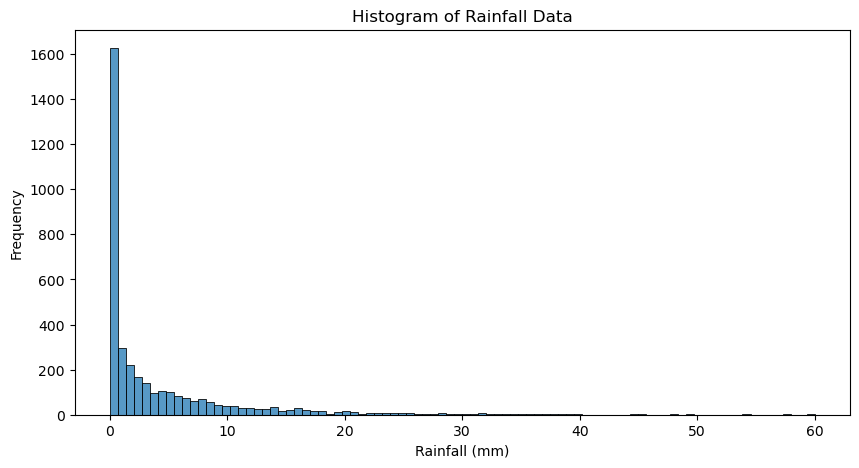

In [5]:
#### visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Plot the distribution of rainfall data as a histogram
sns.histplot(df["Rt"], kde=False)

# Add labels and title to the plot
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of Rainfall Data")
# plt.xlim(0, 80)
# plt.ylim(0, 300)
plt.show()

# 1. Data splitting

##  Train, Validation and Test data 
###  70% train (2550 data points)
###  15% train (547 data points)
###  15% train (547 data points)

In [6]:
df_train = df.iloc[:2550]

df_val = df.iloc[2550:3097] 

# df_test = df.iloc[3097:] 
df_test = df.tail(547).iloc[:]   ## gives the same result as the above line of code

In [7]:
df_train

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
Date,,,,,,,,,,
09/10/2000,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,12.9,70.300
10/10/2000,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,2.9,73.510
11/10/2000,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,7.7,96.170
12/10/2000,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,7.7,132.600
13/10/2000,2.7,21.9,10.3,21.4,15.7,11.8,1.6,2.8,1.1,119.700
...,...,...,...,...,...,...,...,...,...,...
28/09/2007,0.5,0.0,0.7,7.5,5.6,26.1,2.4,6.0,4.9,15.180
29/09/2007,0.5,0.5,0.0,0.7,7.5,5.6,26.1,2.4,6.0,12.430
30/09/2007,1.1,0.5,0.5,0.0,0.7,7.5,5.6,26.1,2.4,10.660


# 2. Normalization

In [8]:
import pandas as pd
import numpy as np

### General function for all the normalization methods

def normalize_df(data, norm_method):     

    ## Normalize data using specified method
 
    if norm_method == 'minmax':
        # Min-Max normalization
        data_n = (data - data.min()) / (data.max() - data.min())
    elif norm_method == 'zscore':
        # Z-score normalization
        mean = data.mean()
        std = data.std()
        data_n = (data - mean) / std
    elif norm_method == 'max':
        # Max normalization
        data_n = 1 - ((data.max() - data)/data.max())
    else:
        raise ValueError("Invalid normalization method. Choose from: 'minmax', 'zscore', 'max'")
    return data_n



### Standard normalization  (Data sets for training, validation and testing are nromalized separately)

In [9]:
## Z_score(standard)
df_train_norm = normalize_df(df_train, 'zscore')
df_val_norm = normalize_df(df_val, 'zscore')
df_test_norm = normalize_df(df_test, 'zscore')

In [10]:
###example
df_train_norm.describe()

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
count,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03,2.550000e+03
mean,-2.099671e-15,-2.549943e-15,-1.856685e-15,-2.574847e-15,-2.324807e-15,-2.219924e-15,-2.402566e-15,-2.379970e-15,-2.489621e-15,1.455045e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.082633e-01,-6.088429e-01,-6.089583e-01,-6.090787e-01,-6.091250e-01,-6.095501e-01,-6.100155e-01,-6.101733e-01,-6.103107e-01,-8.089168e-01
25%,-6.082633e-01,-6.088429e-01,-6.089583e-01,-6.090787e-01,-6.091250e-01,-6.095501e-01,-6.100155e-01,-6.101733e-01,-6.103107e-01,-6.712789e-01
50%,-4.413379e-01,-4.343651e-01,-4.268866e-01,-4.270013e-01,-4.270444e-01,-4.274705e-01,-4.279337e-01,-4.280835e-01,-4.282758e-01,-3.507176e-01
75%,1.808389e-01,1.801004e-01,1.800189e-01,1.799234e-01,1.798909e-01,1.794615e-01,1.903855e-01,1.902630e-01,1.898844e-01,2.884958e-01
max,8.496762e+00,8.494350e+00,8.494624e+00,8.494792e+00,8.494905e+00,8.494430e+00,8.494071e+00,8.494315e+00,8.491435e+00,9.760296e+00


In [11]:
### convert the dataframes to numpy arrays

df_train_f = df_train_norm.to_numpy()

df_val_f = df_val_norm.to_numpy()

df_test_f = df_test_norm.to_numpy()

In [12]:
### Define input and output sequences (list of sub sequences)

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1] 
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_in, n_steps_out = 1, 1    #### 1 input sequences and 1 output sequences



### Split into input and target variables

In [13]:
#### Training data


X_train, y_train = split_sequences(df_train_f, n_steps_in, n_steps_out)
print(X_train.shape, y_train.shape)

# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 9   ## 9 rainfall inputs

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
print(X_train.shape)


(2550, 1, 9) (2550, 1)
(2550, 1, 9)


In [14]:
#### validation data

X_val, y_val = split_sequences(df_val_f , n_steps_in, n_steps_out)


X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

### reshape

X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

print(X_val.shape, y_val.shape)


(547, 1, 9) (547, 1)


In [15]:
#### Test data

X_test, y_test = split_sequences(df_test_f , n_steps_in, n_steps_out)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

print(X_test.shape, y_test.shape)


(547, 1, 9) (547, 1)


In [16]:
#### model fitting
import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import save_model

from tensorflow.keras import initializers

from tensorflow.keras import layers


## Hyperparameter tuning using KerasTuner

In [17]:

import keras_tuner as kt


from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner.engine.hyperparameters import Choice,Float

### a. Define model (Using model_buider function)
### (https://www.tensorflow.org/tutorials/keras/keras_tuner)
## MLP

In [18]:

def model_builder(hp):
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten(input_shape = (n_steps_in, n_features)))   ### flattening is important when using this function
 ###1. Tune the number of units in the first Dense layer
     
    hp_units = hp.Int('units', min_value = 1, max_value = 100, step = 1)
    
###2. Tune the activation function

    hp_activation = hp.Choice("activation", ["relu", "tanh", "sigmoid"])
    
###3. Tune the weight initialization
    hp_initializer=hp.Choice('weight_init', ['he_uniform', 'glorot_uniform', 'random_normal' , 'lecun_normal'])  ##
    
       ### Fix the seeds for reproducibility purposes   
        
    if hp_initializer == 'he_uniform':
        init = tf.keras.initializers.he_uniform(seed=1)
    elif hp_initializer == 'glorot_uniform':
        init = tf.keras.initializers.glorot_uniform(seed=1)
    elif hp_initializer == 'random_normal':
        init = tf.keras.initializers.RandomNormal(seed=1)
    else:
        init = tf.keras.initializers.lecun_normal(seed=1)
    
###4. Tune the number of layers

    for i in range(hp.Int("num_layers", 1, 3)):
        
        model.add(keras.layers.Dense(units = hp_units, activation = hp_activation, kernel_initializer = init))
        model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
    ### Output layer
   
    model.add(keras.layers.Dense(1, kernel_initializer = init))
    model.add(Dropout(hp.Float('dropout_rate', 0, 0.3, step=0.1)))
###4. Tune the optimizer 

    hp_optimizer = hp.Choice("optimizer", ['Adam', 'SGD', 'RMSprop'])

    model.compile (
                    optimizer = hp_optimizer, ##(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))###
                  
                    loss='mean_squared_error',
                   
                    metrics=[tf.keras.metrics.MeanSquaredError()])
    
  
    return model

    
 

### b.  Instantiate the tuner and perform hypertuning

In [19]:
from keras_tuner.tuners import RandomSearch

In [66]:
#### Random search 
tuner = RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='Exhaustive_Opt_norm',
    project_name='Teifi_MLP_RandomS_2')


In [67]:
### Create a callback to stop training early after reaching a certain value for the validation loss.

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [68]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [69]:
from keras.callbacks import TensorBoard

import datetime, os
log_dir = "Exhaustive_Opt_norm/Teifi_MLP_RandomS_2"    ### + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### C. Run hyperparameter search 

# 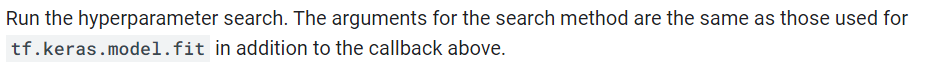

In [70]:
tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_val, y_val), 
             callbacks=[stop_early,tf.keras.callbacks.TensorBoard("Exhaustive_Opt_norm/Teifi_MLP_RandomS_2",  histogram_freq=1)])

Trial 10 Complete [00h 00m 06s]
val_loss: 0.2631123960018158

Best val_loss So Far: 0.20996344089508057
Total elapsed time: 00h 01m 11s
INFO:tensorflow:Oracle triggered exit


In [71]:
tuner.results_summary()

Results summary
Results in Exhaustive_Opt_norm\Teifi_MLP_RandomS_2
Showing 10 best trials
Trial summary
Hyperparameters:
units: 17
activation: relu
weight_init: glorot_uniform
num_layers: 2
dropout_rate: 0.0
optimizer: RMSprop
Score: 0.20996344089508057
Trial summary
Hyperparameters:
units: 11
activation: relu
weight_init: lecun_normal
num_layers: 1
dropout_rate: 0.1
optimizer: Adam
Score: 0.21461737155914307
Trial summary
Hyperparameters:
units: 82
activation: relu
weight_init: lecun_normal
num_layers: 1
dropout_rate: 0.2
optimizer: RMSprop
Score: 0.22030246257781982
Trial summary
Hyperparameters:
units: 64
activation: sigmoid
weight_init: random_normal
num_layers: 1
dropout_rate: 0.0
optimizer: RMSprop
Score: 0.22884733974933624
Trial summary
Hyperparameters:
units: 73
activation: sigmoid
weight_init: glorot_uniform
num_layers: 3
dropout_rate: 0.0
optimizer: SGD
Score: 0.24171239137649536
Trial summary
Hyperparameters:
units: 56
activation: tanh
weight_init: glorot_uniform
num_layers

In [73]:
%tensorboard --logdir Exhaustive_Opt_norm/Teifi_MLP_RandomS_2

Reusing TensorBoard on port 6006 (pid 11520), started 0:05:51 ago. (Use '!kill 11520' to kill it.)

### steps in tensorboard

In [27]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [29]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10276), started 7 days, 2:28:03 ago. (Use '!kill 10276' to kill it.)

In [30]:
%tensorboard --logdir /Exhaustive_Opt_norm/

Reusing TensorBoard on port 6006 (pid 9904), started 7 days, 2:27:50 ago. (Use '!kill 9904' to kill it.)

In [31]:
%tensorboard --logdir AMT_Exhaustive_optimization/Test1--port=7007

Reusing TensorBoard on port 6006 (pid 3664), started 7 days, 2:27:35 ago. (Use '!kill 3664' to kill it.)

## d.  get the optimal hyperparameters

In [32]:

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

print(f"""
The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is {best_hps.get('units')}, 
The optimal activation function is {best_hps.get('activation')},
The optimal weight initialization is {best_hps.get('weight_init')}
The optimal optimizer is {best_hps.get('optimizer')}.
The optimal number of layers is {best_hps.get('num_layers')},
The optimal dropout rate is {best_hps.get('dropout_rate')},

""")




The hyperparameter search is complete. 

The optimal number of units in the first densely-connected layer is 5, 
The optimal activation function is sigmoid,
The optimal weight initialization is random_normal
The optimal optimizer is Adam.
The optimal number of layers is 1,
The optimal dropout rate is 0.0,




## e. Train the model using the best model

In [33]:
model = tuner.hypermodel.build(best_hps)


In [34]:
### model training 
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_amt_1 = model.fit(X_train, y_train, epochs=500, validation_data = (X_val, y_val), shuffle = 0)##, callbacks=[early_stopping])


Epoch 1/500
80/80 [==============================] - 1s 5ms/step - loss: 0.9958 - mean_squared_error: 0.9958 - val_loss: 0.9833 - val_mean_squared_error: 0.9833
Epoch 2/500
80/80 [==============================] - 0s 2ms/step - loss: 0.9773 - mean_squared_error: 0.9773 - val_loss: 0.9581 - val_mean_squared_error: 0.9581
Epoch 3/500
80/80 [==============================] - 0s 2ms/step - loss: 0.9445 - mean_squared_error: 0.9445 - val_loss: 0.9124 - val_mean_squared_error: 0.9124
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 0.8925 - mean_squared_error: 0.8925 - val_loss: 0.8475 - val_mean_squared_error: 0.8475
Epoch 5/500
80/80 [==============================] - 0s 2ms/step - loss: 0.8277 - mean_squared_error: 0.8277 - val_loss: 0.7737 - val_mean_squared_error: 0.7737
Epoch 6/500
80/80 [==============================] - 0s 2ms/step - loss: 0.7606 - mean_squared_error: 0.7606 - val_loss: 0.7016 - val_mean_squared_error: 0.7016
Epoch 7/500
80/80 [===============

80/80 [==============================] - 0s 2ms/step - loss: 0.2563 - mean_squared_error: 0.2563 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 102/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2557 - mean_squared_error: 0.2557 - val_loss: 0.1956 - val_mean_squared_error: 0.1956
Epoch 103/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2551 - mean_squared_error: 0.2551 - val_loss: 0.1951 - val_mean_squared_error: 0.1951
Epoch 104/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2545 - mean_squared_error: 0.2545 - val_loss: 0.1946 - val_mean_squared_error: 0.1946
Epoch 105/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2538 - mean_squared_error: 0.2538 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
Epoch 106/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 107/500
80/80 [===============

80/80 [==============================] - 0s 3ms/step - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 202/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2203 - mean_squared_error: 0.2203 - val_loss: 0.1722 - val_mean_squared_error: 0.1722
Epoch 203/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 204/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 205/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2197 - mean_squared_error: 0.2197 - val_loss: 0.1719 - val_mean_squared_error: 0.1719
Epoch 206/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 207/500
80/80 [===============

80/80 [==============================] - 0s 3ms/step - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 302/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 303/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 304/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2069 - mean_squared_error: 0.2069 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 305/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2068 - mean_squared_error: 0.2068 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 306/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2067 - mean_squared_error: 0.2067 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 307/500
80/80 [===============

80/80 [==============================] - 0s 2ms/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 402/500
80/80 [==============================] - 0s 2ms/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 403/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1999 - mean_squared_error: 0.1999 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 404/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1999 - mean_squared_error: 0.1999 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 405/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1998 - mean_squared_error: 0.1998 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 406/500
80/80 [==============================] - 0s 2ms/step - loss: 0.1998 - mean_squared_error: 0.1998 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 407/500
80/80 [===============

## Plot training and validation errors

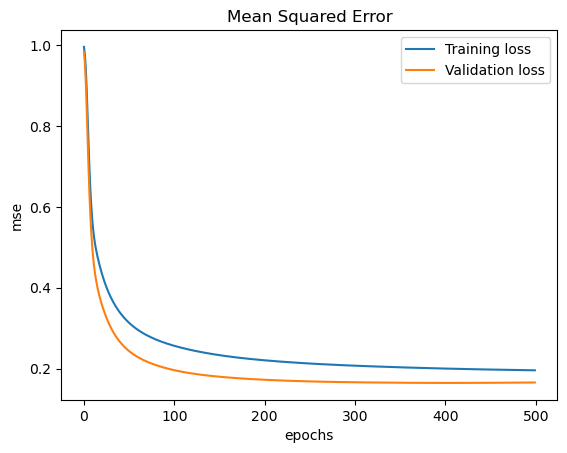

In [35]:
plt.plot(mlp_amt_1.history['mean_squared_error'], label = 'Training loss')
plt.plot(mlp_amt_1.history['val_mean_squared_error'], label = 'Validation loss')
plt.title('Mean Squared Error')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.legend()

In [36]:
model.summary()   #### this shows us that the number of layers are 3 in this MLP model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 5)                 50        
                                                                 
 dropout (Dropout)           (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [37]:
#### find the best epoch by looking in to the validation loss

val_acc_per_epoch = mlp_amt_1.history['val_loss']   

#### 'val_loss' should align with the objective function used when applying 'tuner.search' (both should be loss or both accuracy)

best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1

print('Best epoch: %d' % (best_epoch,))

Best epoch: 404


In [38]:
### Re-instantiate the hypermodel and train it with the optimal number of epochs from above.

hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model

hypermodel.fit(X_train, y_train, epochs= best_epoch, verbose = 1, validation_data=(X_val, y_val), shuffle = False) 

# hypermodel.fit(X_train, y_train, epochs= 250, verbose = 1, validation_data=(X_val, y_val), shuffle = False) 


Epoch 1/404
80/80 [==============================] - 1s 5ms/step - loss: 0.9958 - mean_squared_error: 0.9958 - val_loss: 0.9833 - val_mean_squared_error: 0.9833
Epoch 2/404
80/80 [==============================] - 0s 3ms/step - loss: 0.9773 - mean_squared_error: 0.9773 - val_loss: 0.9581 - val_mean_squared_error: 0.9581
Epoch 3/404
80/80 [==============================] - 0s 3ms/step - loss: 0.9445 - mean_squared_error: 0.9445 - val_loss: 0.9124 - val_mean_squared_error: 0.9124
Epoch 4/404
80/80 [==============================] - 0s 2ms/step - loss: 0.8925 - mean_squared_error: 0.8925 - val_loss: 0.8475 - val_mean_squared_error: 0.8475
Epoch 5/404
80/80 [==============================] - 0s 2ms/step - loss: 0.8277 - mean_squared_error: 0.8277 - val_loss: 0.7737 - val_mean_squared_error: 0.7737
Epoch 6/404
80/80 [==============================] - 0s 3ms/step - loss: 0.7606 - mean_squared_error: 0.7606 - val_loss: 0.7016 - val_mean_squared_error: 0.7016
Epoch 7/404
80/80 [===============

80/80 [==============================] - 0s 3ms/step - loss: 0.2563 - mean_squared_error: 0.2563 - val_loss: 0.1961 - val_mean_squared_error: 0.1961
Epoch 102/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2557 - mean_squared_error: 0.2557 - val_loss: 0.1956 - val_mean_squared_error: 0.1956
Epoch 103/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2551 - mean_squared_error: 0.2551 - val_loss: 0.1951 - val_mean_squared_error: 0.1951
Epoch 104/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2545 - mean_squared_error: 0.2545 - val_loss: 0.1946 - val_mean_squared_error: 0.1946
Epoch 105/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2538 - mean_squared_error: 0.2538 - val_loss: 0.1941 - val_mean_squared_error: 0.1941
Epoch 106/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2532 - mean_squared_error: 0.2532 - val_loss: 0.1937 - val_mean_squared_error: 0.1937
Epoch 107/404
80/80 [===============

80/80 [==============================] - 0s 3ms/step - loss: 0.2205 - mean_squared_error: 0.2205 - val_loss: 0.1723 - val_mean_squared_error: 0.1723
Epoch 202/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2203 - mean_squared_error: 0.2203 - val_loss: 0.1722 - val_mean_squared_error: 0.1722
Epoch 203/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.1721 - val_mean_squared_error: 0.1721
Epoch 204/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2199 - mean_squared_error: 0.2199 - val_loss: 0.1720 - val_mean_squared_error: 0.1720
Epoch 205/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2197 - mean_squared_error: 0.2197 - val_loss: 0.1719 - val_mean_squared_error: 0.1719
Epoch 206/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 0.1718 - val_mean_squared_error: 0.1718
Epoch 207/404
80/80 [===============

80/80 [==============================] - 0s 2ms/step - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 302/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 303/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2070 - mean_squared_error: 0.2070 - val_loss: 0.1661 - val_mean_squared_error: 0.1661
Epoch 304/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2069 - mean_squared_error: 0.2069 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 305/404
80/80 [==============================] - 0s 2ms/step - loss: 0.2068 - mean_squared_error: 0.2068 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 306/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2067 - mean_squared_error: 0.2067 - val_loss: 0.1660 - val_mean_squared_error: 0.1660
Epoch 307/404
80/80 [===============

80/80 [==============================] - 0s 2ms/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 402/404
80/80 [==============================] - 0s 3ms/step - loss: 0.2000 - mean_squared_error: 0.2000 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 403/404
80/80 [==============================] - 0s 3ms/step - loss: 0.1999 - mean_squared_error: 0.1999 - val_loss: 0.1646 - val_mean_squared_error: 0.1646
Epoch 404/404
80/80 [==============================] - 0s 3ms/step - loss: 0.1999 - mean_squared_error: 0.1999 - val_loss: 0.1646 - val_mean_squared_error: 0.1646


## f. Test best model

In [39]:
# eval_result = model.evaluate(X_test, y_test)
eval_result = hypermodel.evaluate(X_test, y_test)

print("[test loss, test accuracy]:", eval_result)

18/18 [==============================] - 0s 2ms/step - loss: 0.2505 - mean_squared_error: 0.2505
[test loss, test accuracy]: [0.2505243718624115, 0.2505243718624115]


In [40]:
# Y_pred = model.predict(X_test)   ### when using early stopping
Y_pred = hypermodel.predict(X_test)   

18/18 [==============================] - 0s 2ms/step


In [41]:
Y_pred

array([[-4.88313079e-01],
       [-5.91773868e-01],
       [-5.33867359e-01],
       [-6.31670356e-01],
       [-6.13974452e-01],
       [-4.54974055e-01],
       [-2.81784296e-01],
       [-2.56741762e-01],
       [-2.52167523e-01],
       [-2.68714547e-01],
       [-4.04360771e-01],
       [-3.56212139e-01],
       [-3.40230107e-01],
       [-3.14826369e-01],
       [-5.02366185e-01],
       [-3.43101144e-01],
       [-5.24575949e-01],
       [-5.78249931e-01],
       [-5.66005230e-01],
       [-5.45232773e-01],
       [-6.04054570e-01],
       [-6.16456747e-01],
       [-5.41285634e-01],
       [-6.05563998e-01],
       [-4.25710201e-01],
       [-5.94602823e-02],
       [-1.92251146e-01],
       [-1.57481372e-01],
       [ 3.05361748e-02],
       [-1.36311769e-01],
       [-1.18561208e-01],
       [-1.41568065e-01],
       [-4.23794985e-02],
       [-4.74142432e-01],
       [-4.43252444e-01],
       [-3.87097299e-01],
       [-5.41570425e-01],
       [-5.76292992e-01],
       [-5.9

In [42]:
y_test

array([[-0.56212305],
       [-0.57290687],
       [-0.57818475],
       [-0.5882844 ],
       [-0.58369069],
       [-0.51338408],
       [-0.42525648],
       [-0.4581618 ],
       [-0.44578158],
       [-0.46532929],
       [-0.51706557],
       [-0.53729745],
       [-0.54394367],
       [-0.55342431],
       [-0.53309469],
       [-0.49986358],
       [-0.49627984],
       [-0.54475816],
       [-0.56886701],
       [-0.58202913],
       [-0.58880567],
       [-0.59567995],
       [-0.60297776],
       [-0.59861211],
       [-0.57404715],
       [-0.34380768],
       [-0.40114764],
       [-0.43991727],
       [-0.2613815 ],
       [-0.3356628 ],
       [-0.41352786],
       [-0.44610738],
       [-0.46044236],
       [-0.47640633],
       [-0.48878655],
       [-0.4988862 ],
       [-0.49953779],
       [-0.52403759],
       [-0.54381336],
       [-0.56495746],
       [-0.5844726 ],
       [-0.59056497],
       [-0.56036375],
       [ 0.07842289],
       [ 0.11784411],
       [ 0

In [43]:
y_test.shape

(547, 1)

In [44]:
print(y_test[:,:-1].shape)   
print(y_test[:,1:2].shape)

(547, 0)
(547, 0)


In [45]:
y_test[:,-1:]    ##### all rows and all columns including -1(which is the last column)

array([[-0.56212305],
       [-0.57290687],
       [-0.57818475],
       [-0.5882844 ],
       [-0.58369069],
       [-0.51338408],
       [-0.42525648],
       [-0.4581618 ],
       [-0.44578158],
       [-0.46532929],
       [-0.51706557],
       [-0.53729745],
       [-0.54394367],
       [-0.55342431],
       [-0.53309469],
       [-0.49986358],
       [-0.49627984],
       [-0.54475816],
       [-0.56886701],
       [-0.58202913],
       [-0.58880567],
       [-0.59567995],
       [-0.60297776],
       [-0.59861211],
       [-0.57404715],
       [-0.34380768],
       [-0.40114764],
       [-0.43991727],
       [-0.2613815 ],
       [-0.3356628 ],
       [-0.41352786],
       [-0.44610738],
       [-0.46044236],
       [-0.47640633],
       [-0.48878655],
       [-0.4988862 ],
       [-0.49953779],
       [-0.52403759],
       [-0.54381336],
       [-0.56495746],
       [-0.5844726 ],
       [-0.59056497],
       [-0.56036375],
       [ 0.07842289],
       [ 0.11784411],
       [ 0

## Evaluation metics

In [46]:
###nse

import hydroeval as he
nse = he.evaluator(he.nse, Y_pred, y_test[:,-1:]  )
print(nse)

[0.74901678]


In [47]:
##rmse
rmse = he.evaluator(he.rmse, Y_pred, y_test[:,-1:]  )
print(rmse)

[0.50052411]


In [48]:
###logrmse
from sklearn.metrics import mean_squared_error
#### log of predicted values
y_pred_lg = np.log1p(Y_pred)

#### log of test values
y_test_lg = np.log1p(y_test[:,-1:])


In [49]:
##calculate log rmse
mse = mean_squared_error(y_pred_lg, y_test_lg)
rmse_lg = np.sqrt(mse)   
print(rmse_lg)

0.43996180402615626


## g. plot

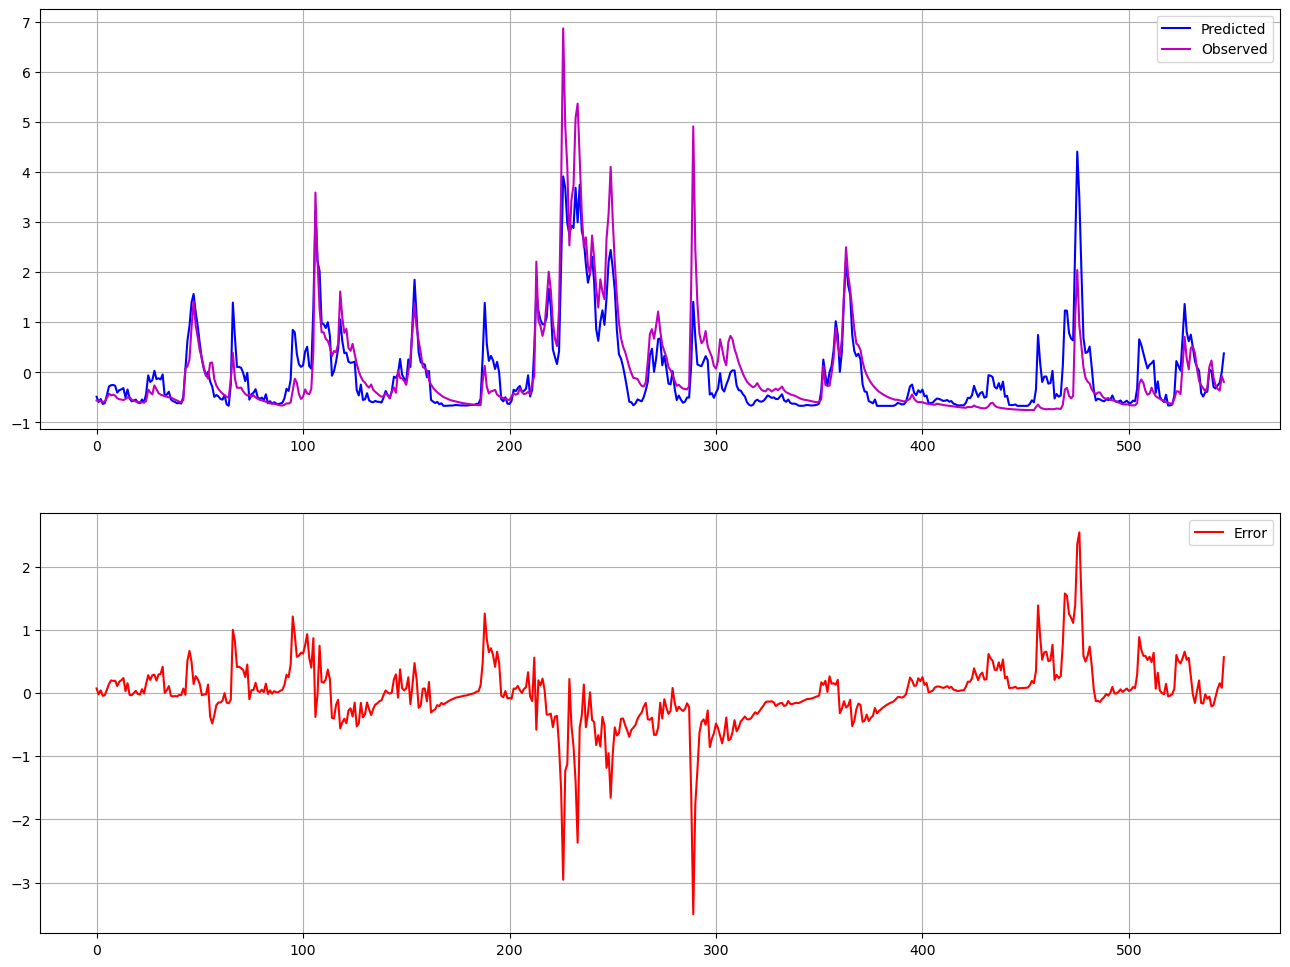

In [50]:
import matplotlib.pyplot as plt
# plt.plot(Q_pred)
# plt.plot(y_test)

plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred[:,-1],'b', label = "Predicted")

plt.plot(y_test[:,-1], 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred[:,-1] - y_test[:,-1],'r', label = "Error")

plt.legend()

plt.grid()

##  save_model

## h. Denormalize the data

In [51]:
#### Original data
df_train_norm

# df_val_f

# df_test_f

,Rt,R_t_1,R_t_2,R_t_3,R_t_4,R_t_5,R_t_6,R_t_7,R_t_8,Qt
Date,,,,,,,,,,
09/10/2000,1.774218,1.181452,-0.366196,-0.184231,-0.442218,0.558794,0.558342,-0.170123,1.346565,1.134868
10/10/2000,2.639196,1.773159,1.181413,-0.366309,-0.184270,-0.442644,0.558342,0.558236,-0.170393,1.226337
11/10/2000,0.954766,2.637962,1.773146,1.181349,-0.366351,-0.184698,-0.443107,0.558236,0.557747,1.872033
12/10/2000,2.715071,0.953872,2.637986,1.773101,1.181334,-0.366777,-0.185158,-0.443258,0.557747,2.910104
13/10/2000,-0.198537,2.713822,0.953823,2.637969,1.773096,1.180899,-0.367240,-0.185297,-0.443445,2.542519
...,...,...,...,...,...,...,...,...,...,...
28/09/2007,-0.532388,-0.608843,-0.502750,0.528905,0.240584,3.350681,-0.245852,0.300276,0.132999,-0.435775
29/09/2007,-0.532388,-0.532983,-0.608958,-0.502867,0.528879,0.240155,3.350262,-0.245994,0.299864,-0.514136
30/09/2007,-0.441338,-0.532983,-0.533095,-0.609079,-0.502911,0.528447,0.239699,3.350279,-0.246241,-0.564572


In [52]:
### normalized data after model training
Y_pred    #### model out put
# y_obser = y_test[:,-1:]      ## observed discharge

array([[-4.88313079e-01],
       [-5.91773868e-01],
       [-5.33867359e-01],
       [-6.31670356e-01],
       [-6.13974452e-01],
       [-4.54974055e-01],
       [-2.81784296e-01],
       [-2.56741762e-01],
       [-2.52167523e-01],
       [-2.68714547e-01],
       [-4.04360771e-01],
       [-3.56212139e-01],
       [-3.40230107e-01],
       [-3.14826369e-01],
       [-5.02366185e-01],
       [-3.43101144e-01],
       [-5.24575949e-01],
       [-5.78249931e-01],
       [-5.66005230e-01],
       [-5.45232773e-01],
       [-6.04054570e-01],
       [-6.16456747e-01],
       [-5.41285634e-01],
       [-6.05563998e-01],
       [-4.25710201e-01],
       [-5.94602823e-02],
       [-1.92251146e-01],
       [-1.57481372e-01],
       [ 3.05361748e-02],
       [-1.36311769e-01],
       [-1.18561208e-01],
       [-1.41568065e-01],
       [-4.23794985e-02],
       [-4.74142432e-01],
       [-4.43252444e-01],
       [-3.87097299e-01],
       [-5.41570425e-01],
       [-5.76292992e-01],
       [-5.9

In [53]:
def denormalize(data, original_data, type='min_max'):   ### default is min-max in this case(there is no reason behind this)

    if type == 'min_max':
        min = np.min(original_data)
        max = np.max(original_data)
        data = data * (max - min) + min
    elif type == 'z_score':
        mean = np.mean(original_data)
        std = np.std(original_data)
        data = data * std + mean
    elif type == 'max':                
        max = np.max(original_data)
        data = data * max
    else:
        raise ValueError("Invalid normalization type. Choose either 'max', 'min_max', or 'z_score'.")
    return data

In [54]:
Y_observ_unnorm = df_test['Qt']

In [55]:
Y_observ_unnorm = Y_observ_unnorm.to_numpy()

###  denormalized predicted discharge

In [56]:
### Standard denormalization (becasue we used standard(z-score) in this experiment)

Y_pred_denorm = denormalize(Y_pred, Y_observ_unnorm, type='z_score')

In [57]:
print(Y_pred_denorm)
print(Y_pred_denorm.shape)

[[ 10.488239 ]
 [  7.315504 ]
 [  9.091269 ]
 [  6.092037 ]
 [  6.634701 ]
 [ 11.510616 ]
 [ 16.821663 ]
 [ 17.589619 ]
 [ 17.729893 ]
 [ 17.222462 ]
 [ 13.062726 ]
 [ 14.539254 ]
 [ 15.029361 ]
 [ 15.8083935]
 [ 10.057286 ]
 [ 14.941318 ]
 [  9.3762   ]
 [  7.7302303]
 [  8.105728 ]
 [  8.742737 ]
 [  6.938904 ]
 [  6.5585785]
 [  8.863779 ]
 [  6.8926163]
 [ 12.408023 ]
 [ 23.639465 ]
 [ 19.567291 ]
 [ 20.633545 ]
 [ 26.399302 ]
 [ 21.282732 ]
 [ 21.827072 ]
 [ 21.121542 ]
 [ 24.163265 ]
 [ 10.922797 ]
 [ 11.870071 ]
 [ 13.592129 ]
 [  8.855047 ]
 [  7.7902412]
 [  7.3645573]
 [  6.5376415]
 [  6.678089 ]
 [  6.3546276]
 [ 10.5002775]
 [ 27.06779  ]
 [ 44.840065 ]
 [ 53.900383 ]
 [ 68.23991  ]
 [ 73.425026 ]
 [ 62.279587 ]
 [ 53.7203   ]
 [ 42.98491  ]
 [ 33.19046  ]
 [ 27.337385 ]
 [ 23.352045 ]
 [ 25.79423  ]
 [ 19.856655 ]
 [ 16.754234 ]
 [ 10.456695 ]
 [ 11.589148 ]
 [ 10.738386 ]
 [  9.167789 ]
 [  8.753593 ]
 [ 11.545462 ]
 [  5.798441 ]
 [  5.03249  ]
 [ 17.849264 ]
 [ 68.1458

### denormalized Observed discharge   # Note:Use this only when input and out put sequence is othr than (1,1)

# Plot the denomalized data

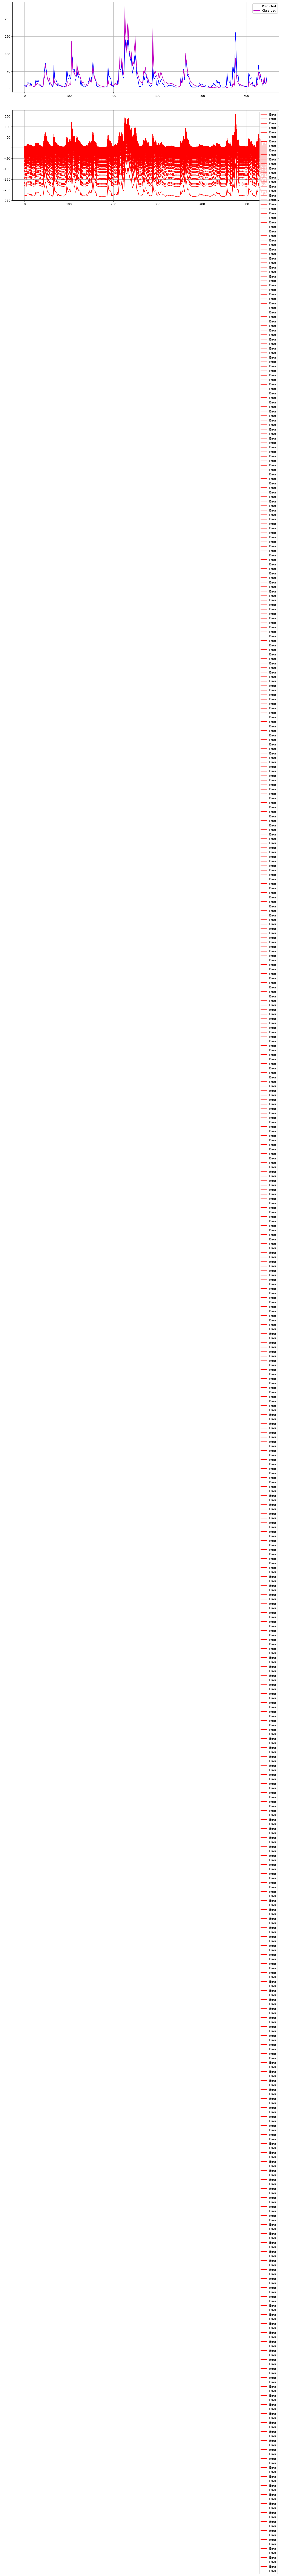

In [58]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)

plt.plot(Y_pred_denorm,'b', label = "Predicted")

plt.plot(Y_observ_unnorm , 'm',  label = "Observed")  

plt.legend()
plt.grid()

plt.subplot(2,1,2)

plt.plot(Y_pred_denorm - Y_observ_unnorm ,'r', label = "Error")

plt.legend()

plt.grid()

### NSE after denormalization

In [59]:
Y_observ_unnorm = Y_observ_unnorm.reshape(547,1)

In [60]:
nse_d = he.evaluator(he.nse, Y_pred_denorm ,Y_observ_unnorm )
print(nse_d)

[0.74898764]


### RMSE after denormalization (in m3/sec)

In [61]:
#### rmse in m3/sec
rmse_d = he.evaluator(he.rmse, Y_pred_denorm, Y_observ_unnorm)
print(rmse_d)    ### 

[15.36404356]


### LogRMSE after denormalization (in m3/sec)

In [62]:
###logrmse
from sklearn.metrics import mean_squared_error
#### log of predicted values
y_pred_lg = np.log1p(Y_pred_denorm)

#### log of test values
y_test_lg = np.log1p(Y_observ_unnorm)


In [63]:
##calculate log rmse
mse = mean_squared_error(y_pred_lg, y_test_lg)
rmse_lg = np.sqrt(mse)   
print(rmse_lg)

0.5762515087682424
